<a href="https://colab.research.google.com/github/shreyas-desai-stevens/KDDM-project/blob/main/KDDM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importing Libraries

In [40]:
import  sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# EDA

## Reading Data

In [41]:
# df = pd.read_csv('/content/drive/Shareddrives/KDDM_Project/adult.csv',names = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native_country', 'Target'])
df = pd.read_csv('./archive/adult.data',names = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native_country', 'Target'])

In [42]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
df.shape

(32561, 15)

In [44]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital-Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native_country    object
Target            object
dtype: object

In [45]:
# Dropping because it is same as label encoding the education column and have no additional value
if 'Education-num' in df.columns or 'Capital-gain' in df.columns or 'Capital-loss' in df.columns:
    df.drop(['Education-num','Capital-gain','Capital-loss'],axis=1,inplace=True)

## Data Exploration for each column

In [46]:
for column in df.columns:
  print(f"{column} : {df[column].nunique()} ")
  print(f"Unique Values:{df[column].unique()}")
  print()

Age : 73 
Unique Values:[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Workclass : 9 
Unique Values:[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt : 21648 
Unique Values:[ 77516  83311 215646 ...  34066  84661 257302]

Education : 16 
Unique Values:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Marital-Status : 7 
Unique Values:[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation : 15 
Unique Values:[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Cra

In [47]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

## Dropping Nulls

In [48]:
df.replace('?', np.nan, inplace=True)

In [49]:
null_values = df.isnull().sum()
print(null_values)

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours-per-week       0
Native_country     583
Target               0
dtype: int64


In [50]:
df_dropped = df.copy(deep=True)
df_transformed = df.copy(deep=True)

In [51]:
for col in df_transformed.columns:
    df_transformed[col].replace(np.nan, df_transformed[col].value_counts().index[0], inplace=True)
df_transformed.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-per-week    0
Native_country    0
Target            0
dtype: int64

## Label Encoding Values

In [52]:
label_encoder = LabelEncoder()
for column in df.columns:
  df[column] = label_encoder.fit_transform(df[column])
  print("Class Labels:", label_encoder.classes_)
  print("Encoded Values:", df[column])

Class Labels: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
Encoded Values: 0        22
1        33
2        21
3        36
4        11
         ..
32556    10
32557    23
32558    41
32559     5
32560    35
Name: Age, Length: 32561, dtype: int64
Class Labels: ['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay' nan]
Encoded Values: 0        6
1        5
2        3
3        3
4        3
        ..
32556    3
32557    3
32558    3
32559    3
32560    4
Name: Workclass, Length: 32561, dtype: int32
Class Labels: [  12285   13769   14878 ... 1366120 1455435 1484705]
Encoded Values: 0         2671
1         2926
2        14086
3        15336
4        19355
         ...  
32556    16528
32557     8080
32558     7883
32559    12881
32560    17825
Name: fnlwgt

In [53]:
X = df.drop(['Target'],axis=1)
y = df['Target']

In [54]:
df.dtypes

Age               int64
Workclass         int32
fnlwgt            int64
Education         int32
Marital-Status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours-per-week    int64
Native_country    int32
Target            int32
dtype: object

# Visualizing Data

## Feature Importance

[0.18566624 0.05052828 0.19546266 0.11542122 0.07476665 0.10076557
 0.09772044 0.01744722 0.02910344 0.11007212 0.02304616]


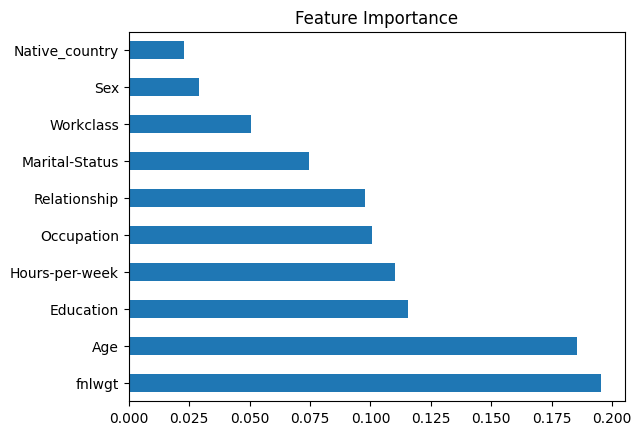

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [56]:
df_dropped.dropna(inplace=True)

In [57]:
df_dropped.shape

(30162, 12)

In [58]:
df_dropped.head()

,Age,Workclass,fnlwgt,Education,Marital-Status,Occupation,Relationship,Race,Sex,Hours-per-week,Native_country,Target
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [59]:
label_encoder = LabelEncoder()
df_dropped['Target'] = label_encoder.fit_transform(df_dropped['Target'])

## Distribution of Attributes with respect to Target

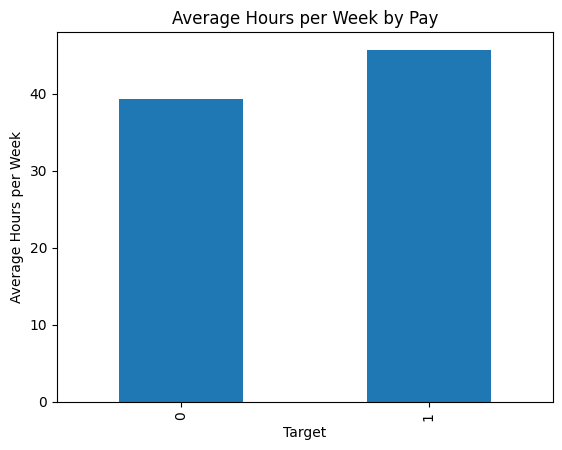

In [60]:
# Hours per week by target
hours_per_week_by_target = df_dropped.groupby("Target")["Hours-per-week"].mean()

# Create a bar plot to visualize the distribution
hours_per_week_by_target.plot(kind="bar")
plt.xlabel("Target")
plt.ylabel("Average Hours per Week")
plt.title("Average Hours per Week by Pay")
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

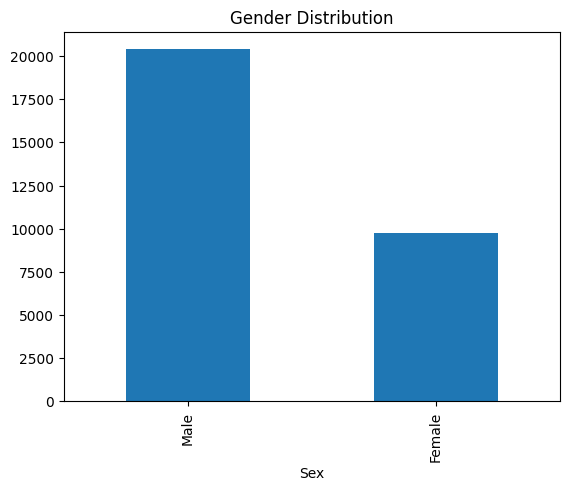

In [61]:
gender = df_dropped['Sex'].value_counts()
gender.plot(kind='bar')
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Distribution of Race for Target <= 50k')

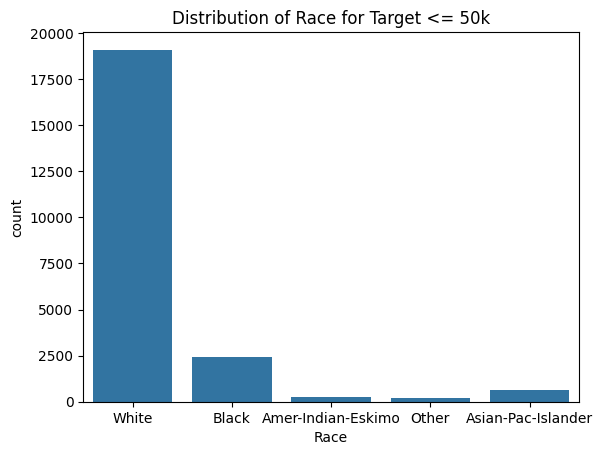

In [62]:
# for column in df_dropped.columns:
sns.countplot(df_dropped[df_dropped['Target']==0],x='Race')
plt.title("Distribution of Race for Target <= 50k")
  # plt.show()

Text(0.5, 1.0, 'Distribution of Race for Target <= 50k')

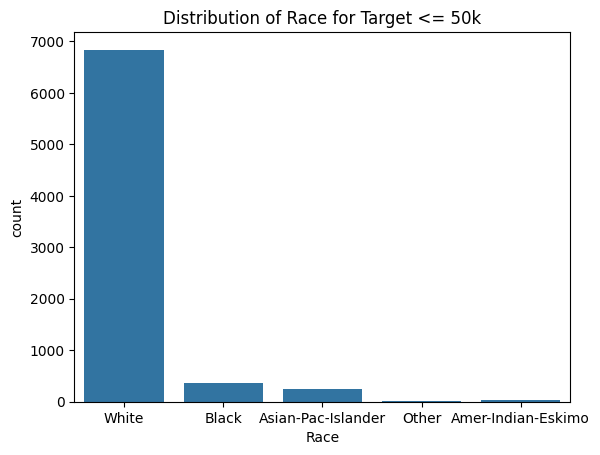

In [63]:
sns.countplot(df_dropped[df_dropped['Target']==1],x='Race')
plt.title("Distribution of Race for Target <= 50k")

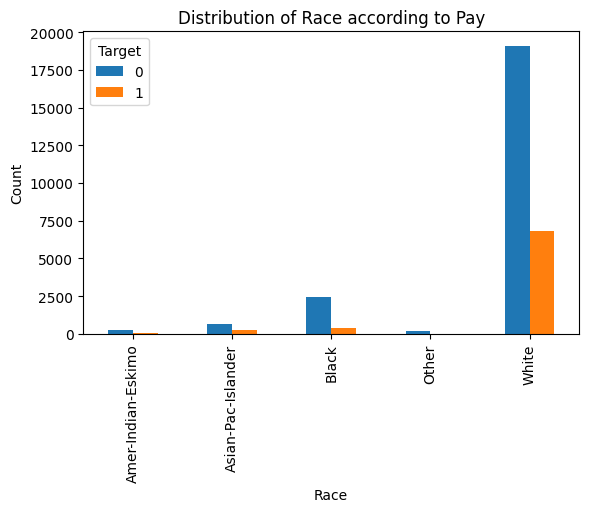

In [64]:
# Group the data by race and sex, and calculate the count of each target value
race_sex_target_counts = df_dropped.groupby(["Race"])["Target"].value_counts().unstack()

# Create a bar plot to visualize the distribution
race_sex_target_counts.plot(kind="bar")
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Distribution of Race according to Pay")
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin to prevent overlapping labels
plt.show()

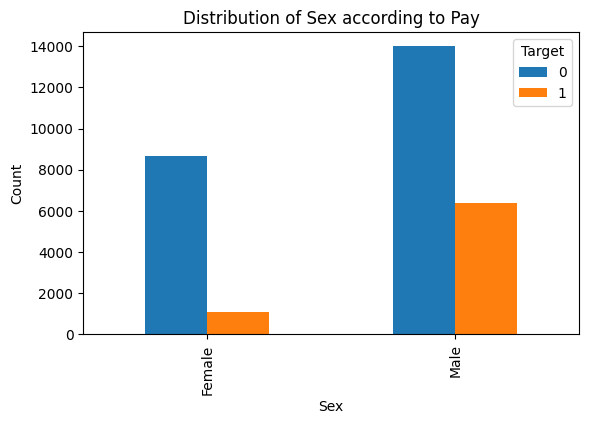

In [65]:
# Group the data by race and sex, and calculate the count of each target value
race_sex_target_counts = df_dropped.groupby(["Sex"])["Target"].value_counts().unstack()

# Create a bar plot to visualize the distribution
race_sex_target_counts.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex according to Pay")
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin to prevent overlapping labels
plt.show()

Text(0.5, 1.0, 'Box Plot Distributions of Gender by Age for Target <= 50k and Target >= 50k')

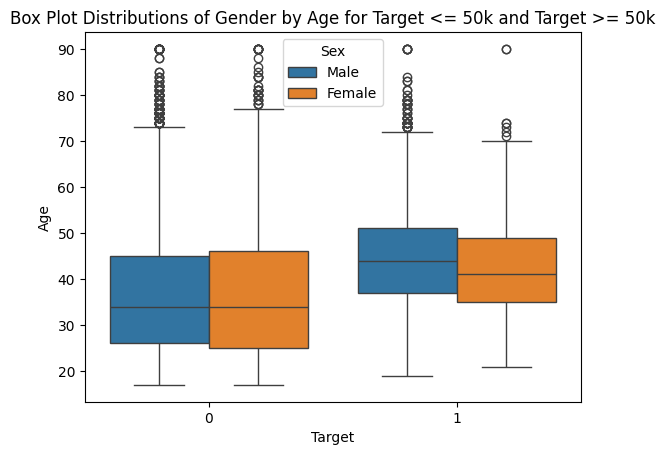

In [66]:
sns.boxplot(x='Target',y='Age',hue='Sex',data=df_dropped)
plt.title("Box Plot Distributions of Gender by Age for Target <= 50k and Target >= 50k")

Text(0.5, 1.0, 'Box Plot Distribution of Race by age for Target <= 50k and Target >= 50k')

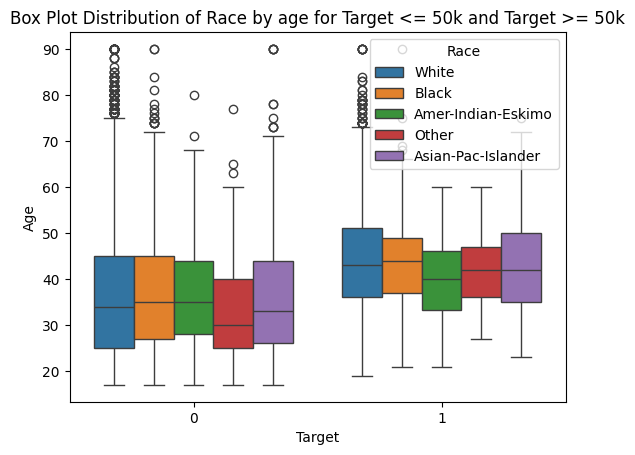

In [67]:
sns.boxplot(x='Target',y='Age',hue='Race',data=df_dropped)
plt.title("Box Plot Distribution of Race by age for Target <= 50k and Target >= 50k")

Text(0.5, 1.0, 'Box Plot Distribution of Workclass for Target <= 50k and Target >= 50k')

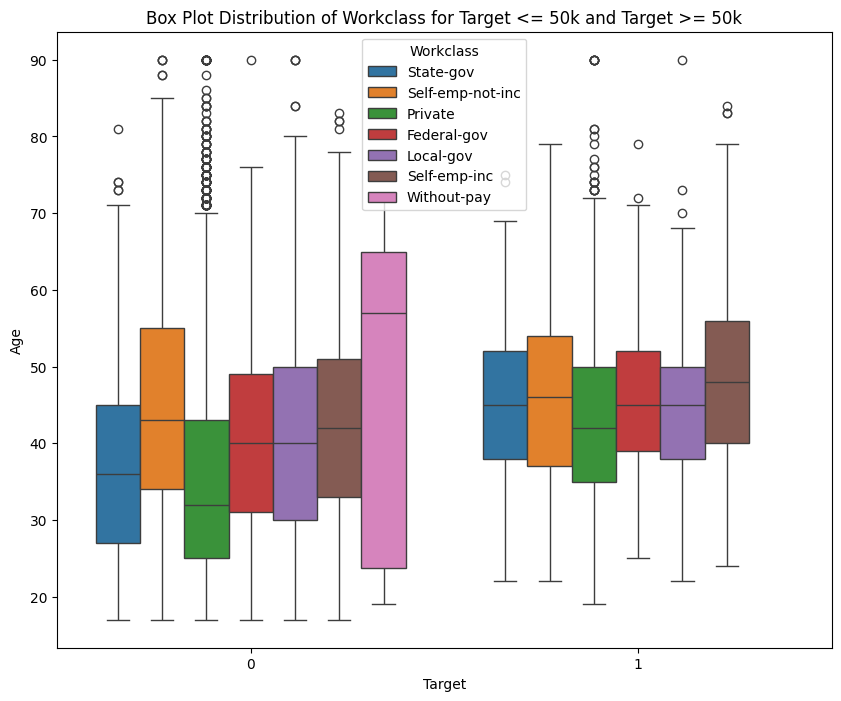

In [68]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Target',y='Age',hue='Workclass',data=df_dropped)
plt.title("Box Plot Distribution of Workclass for Target <= 50k and Target >= 50k")

Text(0.5, 1.0, 'Distribution of Age for Target <= 50k and Target >= 50k')

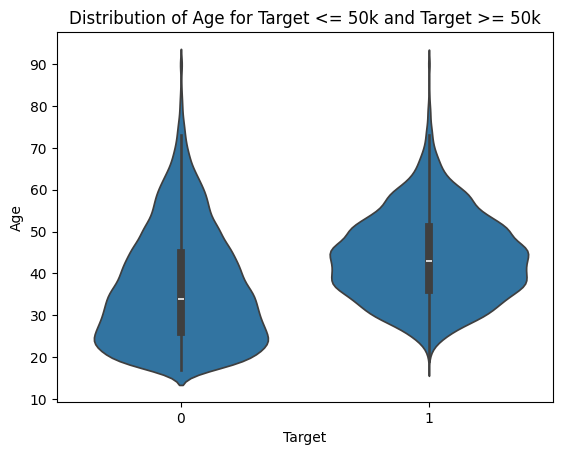

In [69]:
sns.violinplot(x='Target',y='Age',data=df_dropped)
plt.title("Distribution of Age for Target <= 50k and Target >= 50k")

Text(0.5, 1.0, 'Distribution of Age by Gender')

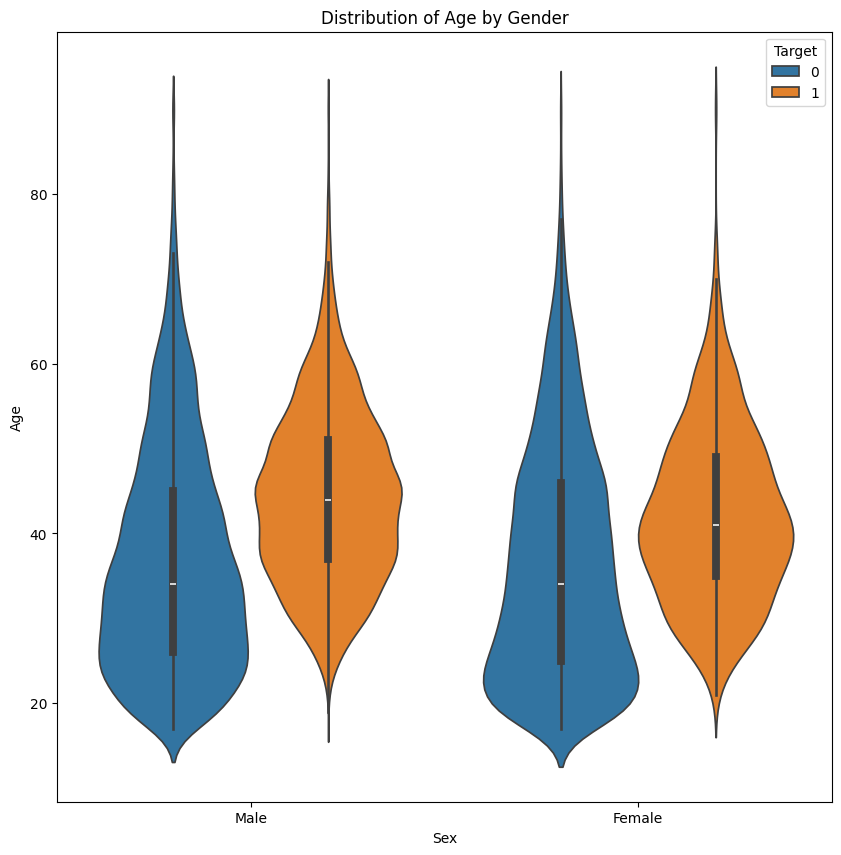

In [70]:
plt.figure(figsize=(10,10))
sns.violinplot(x='Sex',y='Age',hue='Target',data=df_dropped)
plt.title("Distribution of Age by Gender")

In [71]:
df_dropped.head()

,Age,Workclass,fnlwgt,Education,Marital-Status,Occupation,Relationship,Race,Sex,Hours-per-week,Native_country,Target
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


0 cannot be removed from age </br>
workclass is biased towards private employees (verify with boxplot and feature engineering matrix) </br>
normalize the values in original df for final_weight </br>
Most of the people are Highschool grads or have a bachleors degree </br>
Lot of divorceses in data

label_encoder = LabelEncoder()
for column in ['Workclass','Education','Marital-Status','Occupation','Relationship','Race','Sex','Native_country']:
      df_dropped[column] = label_encoder.fit_transform(df_dropped[column])
      print(label_encoder.classes_)

# Approach 1: Dropping All Null Values

## Model Training

### Splitting Data

In [72]:
label_encoder = LabelEncoder()
for column in df_dropped.columns:
    df_dropped[column] = label_encoder.fit_transform(df_dropped[column])
X = df_dropped.drop(['Target'],axis=1)
y = df_dropped['Target']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,shuffle=True)

### K-Nearest Neighbors

In [74]:
for i in [1,3,5,7,9]:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_preds = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_preds)
  print("Accuracy: ",accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_preds))

Accuracy:  0.6754247824285122
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      9059
           1       0.36      0.38      0.37      3006

    accuracy                           0.68     12065
   macro avg       0.57      0.58      0.57     12065
weighted avg       0.68      0.68      0.68     12065

Accuracy:  0.7058433485288024
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      9059
           1       0.39      0.33      0.36      3006

    accuracy                           0.71     12065
   macro avg       0.59      0.58      0.58     12065
weighted avg       0.69      0.71      0.70     12065

Accuracy:  0.7205967675093244
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      9059
           1       0.41      0.28      0.33      3006

    accuracy           

### Gaussian Naive Bayes

In [75]:
nb = GaussianNB()
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(y_test, Y_pred)}\n")

Model Accuracy: 0.7604641525072524
Confusion Matrix:
 [[7113 1946]
 [ 944 2062]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      9059
           1       0.51      0.69      0.59      3006

    accuracy                           0.76     12065
   macro avg       0.70      0.74      0.71     12065
weighted avg       0.79      0.76      0.77     12065




### Random Forest Classifier

In [76]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(y_test, Y_pred)}\n")

Model Accuracy: 0.8260256941566515
Confusion Matrix:
 [[8282  777]
 [1322 1684]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      9059
           1       0.68      0.56      0.62      3006

    accuracy                           0.83     12065
   macro avg       0.77      0.74      0.75     12065
weighted avg       0.82      0.83      0.82     12065




### XGBoost

In [77]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred = xgb.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(y_test, Y_pred)}\n")

Model Accuracy: 0.8310816411106506
Confusion Matrix:
 [[8284  775]
 [1263 1743]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      9059
           1       0.69      0.58      0.63      3006

    accuracy                           0.83     12065
   macro avg       0.78      0.75      0.76     12065
weighted avg       0.82      0.83      0.83     12065




## Hyper-Parameter Optimization

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
xgb = XGBClassifier()
# Define the hyperparameter grid
models = [knn,gnb,rf,xgb]

param_grid = {
    'knn':{
      'n_neighbors': [1, 3, 5, 7, 9, 11],
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan']
    },
    'gnb':{
      'priors': [None]
    },
    'rf':{
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
    },
    'xgb':{
      'learning_rate': [0.01, 0.1, 0.2],
      'n_estimators': [50, 100, 200],
      'max_depth': [3, 5, 7],
      'min_child_weight': [1, 3, 5],
      'subsample': [0.8, 0.9, 1.0],
      'colsample_bytree': [0.8, 0.9, 1.0],
      'gamma': [0, 0.1, 0.2],
      'reg_alpha': [0, 0.1, 0.5],
      'reg_lambda': [0, 0.1, 0.5]
  }
}

for model_name, model in zip(param_grid.keys(), models):
    print(f"Performing Grid Search for {model_name}")

    # Access the hyperparameter grid for the specific model
    hyperparameter_grid = param_grid[model_name]

    # Create GridSearchCV instance for the current model
    grid_search = RandomizedSearchCV(model, hyperparameter_grid, scoring='accuracy', cv=5)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Print the best parameters and estimator for each model
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Estimator for {model_name}: {grid_search.best_estimator_}")

Performing Grid Search for knn
Best Parameters for knn: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
Best Estimator for knn: KNeighborsClassifier(metric='manhattan', n_neighbors=11)
Performing Grid Search for gnb


C:\Users\owais\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for gnb: {'priors': None}
Best Estimator for gnb: GaussianNB()
Performing Grid Search for rf


# Approach 2: Replace Nan Value

## Model Training

### Splitting Data

In [ ]:
label_encoder = LabelEncoder()
for column in df_transformed.columns:
    df_transformed[column] = label_encoder.fit_transform(df_transformed[column])
X = df_transformed.drop(['Target'],axis=1)
y = df_transformed['Target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,shuffle=True)

### K-Nearest Neighbors

In [ ]:
for i in [1,3,5,7,9]:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_preds = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_preds)
  print("Accuracy: ",accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_preds))

### Gaussian Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(y_test, Y_pred)}\n")

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(y_test, Y_pred)}\n")

### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred = xgb.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(y_test, Y_pred)}\n")

## Hyper-Parameter Optimization

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
xgb = XGBClassifier()
# Define the hyperparameter grid
models = [knn,gnb,rf,xgb]

param_grid = {
    'knn':{
      'n_neighbors': [1, 3, 5, 7, 9, 11],
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan']
    },
    'gnb':{
      'priors': [None]
    },
    'rf':{
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
    },
    'xgb':{
      'learning_rate': [0.01, 0.1, 0.2],
      'n_estimators': [50, 100, 200],
      'max_depth': [3, 5, 7],
      'min_child_weight': [1, 3, 5],
      'subsample': [0.8, 0.9, 1.0],
      'colsample_bytree': [0.8, 0.9, 1.0],
      'gamma': [0, 0.1, 0.2],
      'reg_alpha': [0, 0.1, 0.5],
      'reg_lambda': [0, 0.1, 0.5]
  }
}

for model_name, model in zip(param_grid.keys(), models):
    print(f"Performing Grid Search for {model_name}")

    # Access the hyperparameter grid for the specific model
    hyperparameter_grid = param_grid[model_name]

    # Create GridSearchCV instance for the current model
    grid_search = RandomizedSearchCV(model, hyperparameter_grid, scoring='accuracy', cv=5)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Print the best parameters and estimator for each model
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Estimator for {model_name}: {grid_search.best_estimator_}")
    print()